In [1]:
import os
from konlpy.tag import Mecab
from collections import Counter
import re
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [2]:
morphemed_noun_data_file = 'c:\\users\\dschk\\desktop\\netmarble\\data\\morphemed_content.txt'

In [3]:
noun_word_list = []

In [4]:
with open(morphemed_noun_data_file, 'r', encoding='utf-8') as morphemed_noun_data:
    noun_words = morphemed_noun_data.readlines()
    for noun_word in noun_words:
        noun_word = noun_word[0:noun_word.rfind('\\')]
        noun_word_list.append(noun_word)
morphemed_noun_data.close()

In [5]:
len(noun_word_list)

230340

In [6]:
noun_word_list

['불굴',
 '말',
 '쿨타임',
 '불굴',
 '힐',
 '피',
 '쿨타임',
 '표기',
 '실화',
 '퍼',
 '글',
 '면역',
 '기도',
 '불가',
 '돌격',
 '롤',
 '마스터',
 '밸런스',
 '파',
 '때',
 '문제',
 '대',
 '뺑뺑이',
 '영웅',
 '벨',
 '런',
 '패치',
 '게임',
 '돈',
 '유저',
 '패',
 '출시',
 '신경',
 '패',
 '유저',
 '목소',
 '소',
 '반',
 '소통',
 '중요',
 '게임',
 '재미',
 '악랄',
 '팀',
 '재미',
 '싱글',
 '소탕',
 '임',
 '섭주',
 '랭',
 '위',
 '대부분',
 '계정',
 '업',
 '각',
 '템',
 '랭',
 '요망',
 '랭',
 '형',
 '히트',
 '공급',
 '수요',
 '회수',
 '돈',
 '형',
 '돈',
 '신경',
 '돈',
 '마블',
 '경각심',
 '조언',
 '부탁',
 '게임',
 '셈',
 '추',
 '천망',
 '현질',
 '사람',
 '추석',
 '돈',
 '한가위',
 '개',
 '객',
 '환자',
 '양쪽',
 '코스튬',
 '조합',
 '벤트',
 '코스튬',
 '장',
 '말',
 '한정',
 '판매',
 '코스튬',
 '모자',
 '상',
 '제작',
 '장',
 '제작',
 '문제',
 '전설',
 '코스튬',
 '획득',
 '처',
 '현금',
 '술',
 '결장',
 '이번',
 '한정',
 '코스튬',
 '결국',
 '현금',
 '술',
 '전설',
 '수급',
 '처',
 '일반',
 '루비',
 '코',
 '보유',
 '효과',
 '한정',
 '루비',
 '정도',
 '방식',
 '코스튬',
 '현금',
 '코',
 '외형',
 '마음',
 '루비',
 '수급',
 '처',
 '쌈',
 '장',
 '루비',
 '님',
 '덱',
 '쌔',
 '말',
 '전설',
 '금',
 '전설',
 '말',
 '댓글',
 '달마',
 '답',
 '글',

In [7]:
df = pd.DataFrame(columns={'word'})

In [8]:
df['word'] = noun_word_list

In [9]:
df

,word
0,불굴
1,말
2,쿨타임
3,불굴
4,힐
...,...
230335,손해
230336,농
230337,창천
230338,버그


In [10]:
df['word_id'] = df.groupby('word').ngroup() # 데이터 프레임에 존재하는 반복되는 스트링 데이터에 unique id를 부여하는 방법

In [11]:
df

,word,word_id
0,불굴,4513
1,말,3176
2,쿨타임,9838
3,불굴,4513
4,힐,11222
...,...,...
230335,손해,5435
230336,농,1974
230337,창천,9285
230338,버그,4074


In [12]:
# WordCloud 카운트 객체를 이용하여 카운팅하기.
counted_words = Counter(noun_word_list)

# 위에서 카운팅 된 워드의 수를 제한함.
re_counted_words = dict()
for k, v in counted_words.items():
    if v >= 5:
        re_counted_words[k] = v    
len(re_counted_words)

3697

In [13]:
re_counted_words_df = pd.DataFrame({'word':re_counted_words.keys(), 'count':re_counted_words.values()})

In [14]:
re_counted_words_df['count'].describe()

count    3697.000000
mean       58.746281
std       172.305694
min         5.000000
25%         7.000000
50%        14.000000
75%        42.000000
max      4689.000000
Name: count, dtype: float64

In [15]:
# 위에서 카운팅 된 워드의 수를 제한함.
re_counted_words = dict()
for k, v in counted_words.items():
    if v >= 10:
        re_counted_words[k] = v    
len(re_counted_words)

2310

In [16]:
re_counted_words_df = pd.DataFrame({'word':re_counted_words.keys(), 'count':re_counted_words.values()})

In [17]:
re_counted_words_df['count'].describe()

count    2310.000000
mean       90.066667
std       211.911186
min        10.000000
25%        15.000000
50%        30.000000
75%        76.000000
max      4689.000000
Name: count, dtype: float64

In [18]:
re_counted_words_df.sort_values(by=['count'], ascending=False)

,word,count
344,성,4689
62,개,2301
16,때,2182
60,사람,2097
24,게임,2079
...,...,...
2181,기계,10
136,존중,10
702,상교,10
741,일시,10


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

wc = WordCloud(font_path='NanumGothic', 
               #background_color='white', 
               width = 1920, 
               height = 1080, 
               #max_words=1000, 
               #random_state=1,
               #max_font_size=50, 
               #relative_scaling=.5, 
               scale=2.0, 
               min_font_size=4)

wc.generate_from_frequencies(frequencies=re_counted_words)

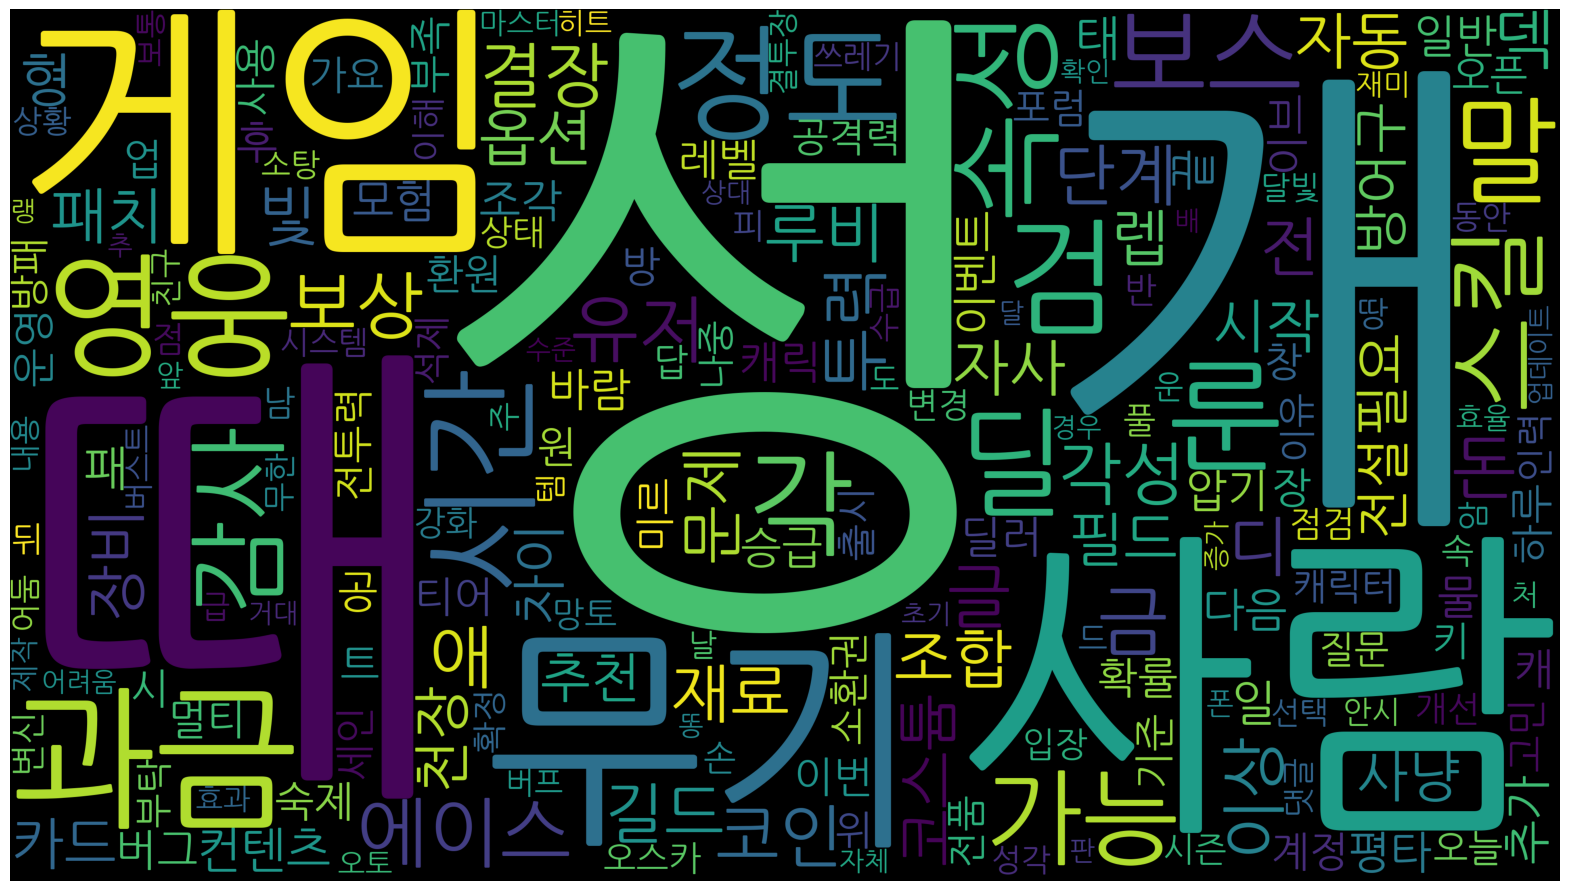

In [20]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
plt.axis("off")
plt.imshow(wc)

In [21]:
re_counted_words_df.sort_values(by=['count'], ascending=False)

,word,count
344,성,4689
62,개,2301
16,때,2182
60,사람,2097
24,게임,2079
...,...,...
2181,기계,10
136,존중,10
702,상교,10
741,일시,10


<AxesSubplot:xlabel='count'>

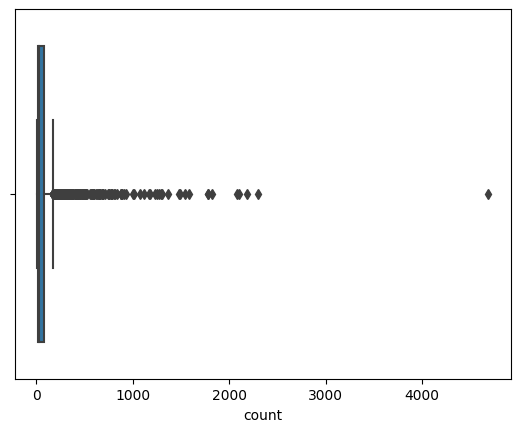

In [24]:
# 현재 re_coutned_words_df 에 있는 count 데이터를 이용해, boxplot을 그려 데이터 값 분포를 확인.
import seaborn as sns
sns.boxplot(x=re_counted_words_df["count"])

In [ ]:
df.groupby('word_id').count().plot.bar()